# Wavefunctions and the Uncertainty Principle
**Companion notebook for Section 1: Mathematical Interlude**

This demo visualizes:
- Gaussian wavefunction in position space ψ(x)
- Fourier transform to momentum space φ(p)
- Heisenberg Uncertainty Principle: Δx·Δp ≥ ℏ/2

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
hbar = 1.0
sigma = 1.0      # Try changing this: 0.5, 1.0, 2.0
N = 4096
L = 20.0 * sigma

# Position grid
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

# Gaussian wavefunction (Eq. 27 from notes)
psi_x = (1/(np.pi*sigma**2))**0.25 * np.exp(-x**2/(2*sigma**2))

print(f"Position normalization: {np.sum(np.abs(psi_x)**2) * dx:.4f}")

Position normalization: 1.0000


# Fourier Transform to Momentum Space
We compute φ(p) using the relation from Eq. (13):
$$\phi(p) = \frac{1}{\sqrt{2\pi\hbar}} \int \psi(x) e^{-ipx/\hbar} dx$$

In [36]:
p = np.fft.fftshift(np.fft.fftfreq(N, d=dx)) * 2*np.pi*hbar
phi_p = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(psi_x))) * dx / np.sqrt(2*np.pi*hbar)
dp = p[1] - p[0]

print(f"Momentum normalization: {np.sum(np.abs(phi_p)**2) * dp:.4f}")

Momentum normalization: 1.0000


## Visualization

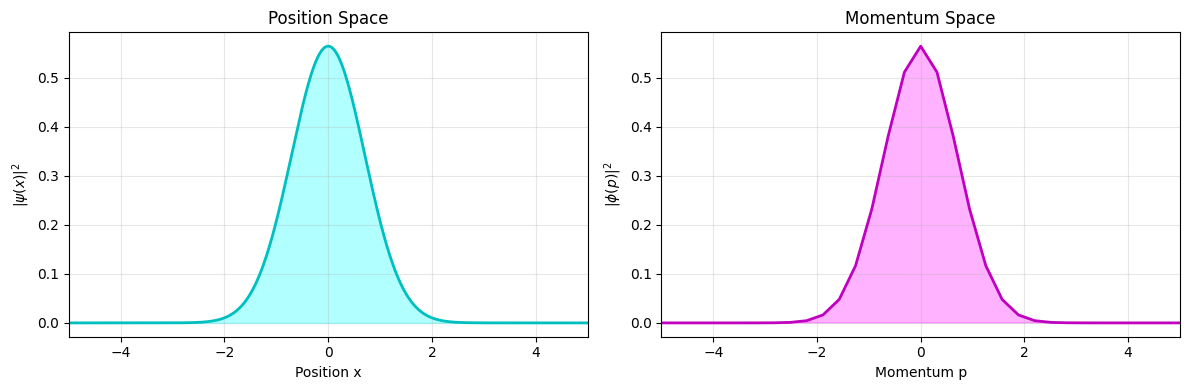

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Position space
ax1.plot(x, np.abs(psi_x)**2, 'c-', linewidth=2)
ax1.fill_between(x, np.abs(psi_x)**2, alpha=0.3, color='cyan')
ax1.set_xlabel('Position x')
ax1.set_ylabel(r'$|\psi(x)|^2$')
ax1.set_title('Position Space')
ax1.set_xlim(-5*sigma, 5*sigma)
ax1.grid(alpha=0.3)

# Momentum space
ax2.plot(p, np.abs(phi_p)**2, 'm-', linewidth=2)
ax2.fill_between(p, np.abs(phi_p)**2, alpha=0.3, color='magenta')
ax2.set_xlabel('Momentum p')
ax2.set_ylabel(r'$|\phi(p)|^2$')
ax2.set_title('Momentum Space')
ax2.set_xlim(-5/sigma, 5/sigma)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Uncertainty Principle Verification
Calculate Δx and Δp, then verify Δx·Δp ≥ ℏ/2


In [39]:
x_mean = np.sum(x * np.abs(psi_x)**2) * dx
x2_mean = np.sum(x**2 * np.abs(psi_x)**2) * dx
delta_x = np.sqrt(x2_mean - x_mean**2)

p_mean = np.sum(p * np.abs(phi_p)**2) * dp
p2_mean = np.sum(p**2 * np.abs(phi_p)**2) * dp
delta_p = np.sqrt(p2_mean - p_mean**2)

print(f"Δx = {delta_x:.4f}")
print(f"Δp = {delta_p:.4f}")
print(f"Δx·Δp = {delta_x * delta_p:.4f}")
print(f"ℏ/2 = {hbar/2:.4f}")
print(f"\nRatio: {(delta_x * delta_p)/(hbar/2):.4f} (should be ≥ 1)")

Δx = 0.7071
Δp = 0.7071
Δx·Δp = 0.5000
ℏ/2 = 0.5000

Ratio: 1.0000 (should be ≥ 1)


## Exercise
**Try changing `sigma` in the first code cell!**
- `sigma = 2.0` → wider ψ(x), narrower φ(p)
- `sigma = 0.5` → narrower ψ(x), wider φ(p)
- Notice Δx·Δp stays constant ≈ 0.5